In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = '/content/drive/MyDrive/DataScienceFinalProject/cleaned_data.csv'
data = pd.read_csv(file_path, thousands=r',')
data.head(), data.columns

(   Unnamed: 0           State           City  Population  V_crime  Murder  \
 0           7  SOUTH CAROLINA       DUE WEST      1240.0        0     0.0   
 1          17  SOUTH CAROLINA  CALHOUN FALLS      1912.0       14     2.0   
 2          27  SOUTH CAROLINA      ABBEVILLE      5017.0       47     9.0   
 3          35       LOUISIANA   CHURCH POINT      4424.0       39     1.0   
 4          45       LOUISIANA        CROWLEY     12621.0      158     1.0   
 
    Rape  Robbery  Aggravated assault  Property crime  ...  housing_cost  \
 0     0        0                   0              18  ...        8148.0   
 1     0        0                  12              31  ...        8148.0   
 2     4        4                  30             123  ...        8148.0   
 3     1        0                  37              78  ...        8700.0   
 4     8       14                 135             528  ...        8700.0   
 
     food_cost  transportation_cost healthcare_cost other_necessities_co

In [3]:
data = data.dropna(subset=['Crime Rate'])

In [4]:
data.shape

(6241, 36)

In [5]:
data.columns.unique()

Index(['Unnamed: 0', 'State', 'City', 'Population', 'V_crime', 'Murder',
       'Rape', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary',
       'Larceny-theft', 'Motor vehicle theft', 'city', 'city_ascii',
       'state_name', 'county_fips', 'county_name', 'population', 'density',
       'source', 'incorporated', 'ranking', 'isMetro', 'areaname',
       'family_member_count', 'housing_cost', 'food_cost',
       'transportation_cost', 'healthcare_cost', 'other_necessities_cost',
       'taxes', 'total_cost', 'median_family_income', 'Total Crimes',
       'Crime Rate'],
      dtype='object')

In [6]:
columns_to_drop = ['Unnamed: 0','city','city_ascii','state_name','county_fips']
data = data.drop(columns=columns_to_drop)

In [7]:
nan_values = data[['population', 'V_crime', 'Murder', 'Rape', 'Robbery',
                    'Aggravated assault', 'Property crime', 'Burglary',
                    'Larceny-theft', 'Motor vehicle theft', 'density',
                    'ranking', 'isMetro', 'total_cost']].isnull().sum()
print(nan_values)

population             0
V_crime                0
Murder                 0
Rape                   0
Robbery                0
Aggravated assault     0
Property crime         0
Burglary               0
Larceny-theft          0
Motor vehicle theft    0
density                0
ranking                0
isMetro                0
total_cost             0
dtype: int64


In [8]:
data.columns.unique()

Index(['State', 'City', 'Population', 'V_crime', 'Murder', 'Rape', 'Robbery',
       'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft',
       'Motor vehicle theft', 'county_name', 'population', 'density', 'source',
       'incorporated', 'ranking', 'isMetro', 'areaname', 'family_member_count',
       'housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost',
       'other_necessities_cost', 'taxes', 'total_cost', 'median_family_income',
       'Total Crimes', 'Crime Rate'],
      dtype='object')

In [9]:
data_subset = data[['Population', 'V_crime', 'Murder', 'Rape', 'Robbery',
       'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft',
       'Motor vehicle theft', 'density', 'incorporated', 'ranking', 'isMetro','housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost',
       'other_necessities_cost', 'taxes', 'total_cost', 'median_family_income','Total Crimes','Crime Rate']]

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_subset_normalized = scaler.fit_transform(data_subset)

data_subset_normalized = pd.DataFrame(data_subset_normalized, columns=data_subset.columns)
data_subset_normalized.head()

,Population,V_crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,...,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,taxes,total_cost,median_family_income,Total Crimes,Crime Rate
0,0.000147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000147,0.000176,0.000140,0.000000,...,0.045065,0.271605,0.756186,0.174689,0.062882,0.045812,0.037611,0.146742,0.000106,0.000566
1,0.000228,0.000293,0.004065,0.000000,0.000000,0.000383,0.000253,0.000646,0.000159,0.000192,...,0.045065,0.271605,0.756186,0.174689,0.062882,0.045812,0.037611,0.146742,0.000265,0.000918
2,0.000598,0.000983,0.018293,0.001444,0.000299,0.000957,0.001006,0.001702,0.000832,0.000320,...,0.045065,0.271605,0.756186,0.174689,0.062882,0.045812,0.037611,0.146742,0.000999,0.001322
3,0.000527,0.000816,0.002033,0.000361,0.000000,0.001181,0.000638,0.001056,0.000533,0.000192,...,0.058282,0.222222,0.719756,0.447283,0.061822,0.125959,0.113434,0.184473,0.000688,0.001032
4,0.001506,0.003304,0.002033,0.002888,0.001045,0.004308,0.004317,0.007747,0.003479,0.001534,...,0.058282,0.222222,0.719756,0.447283,0.061822,0.125959,0.113434,0.184473,0.004032,0.002121


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

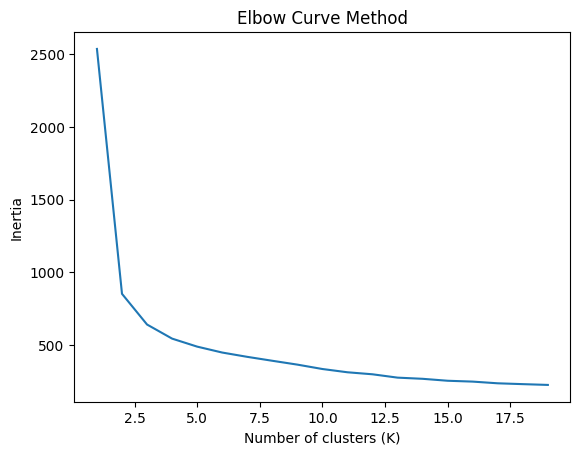

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

potential_ks = range(1, 20)

inertias = []
for k in potential_ks:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(data_subset_normalized)
  inertias.append(model.inertia_)

plt.plot(potential_ks, inertias)
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Curve Method")
plt.show()

In [12]:
from sklearn.cluster import KMeans

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=0)

kmeans.fit(data_subset_normalized)

labels = kmeans.labels_

data_subset_normalized['Cluster'] = labels

print(data_subset_normalized['Cluster'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0       0
1       0
2       0
3       1
4       1
       ..
6236    1
6237    1
6238    1
6239    1
6240    0
Name: Cluster, Length: 6241, dtype: int32


In [13]:
data_subset_normalized['Cluster'].unique()

array([0, 1, 2], dtype=int32)

In [14]:
cluster_counts = data_subset_normalized['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    2742
1    2540
2     959
Name: count, dtype: int64


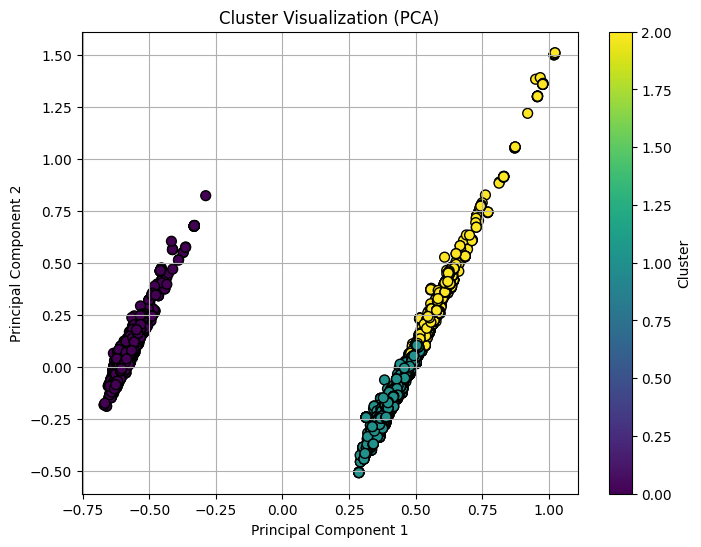

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_subset_normalized.drop('Cluster', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_subset_normalized['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

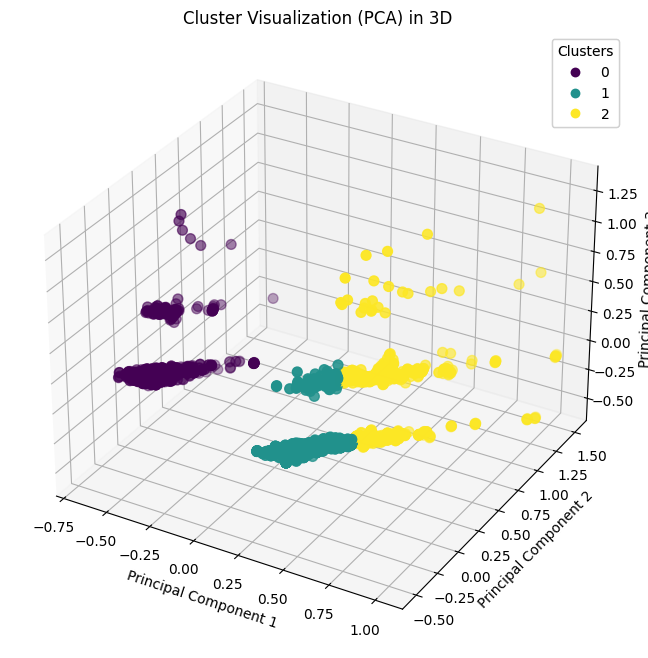

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca_3d = pca.fit_transform(data_subset_normalized.drop('Cluster', axis=1))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c=data_subset_normalized['Cluster'], cmap='viridis', s=50)

legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('Cluster Visualization (PCA) in 3D')
plt.show()

In [17]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca_3d = pca.fit_transform(data_subset_normalized.drop('Cluster', axis=1))

fig = go.Figure(data=[go.Scatter3d(
    x=data_pca_3d[:, 0],
    y=data_pca_3d[:, 1],
    z=data_pca_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=data_subset_normalized['Cluster'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(scene=dict(
                    xaxis_title='Principal Component 1',
                    yaxis_title='Principal Component 2',
                    zaxis_title='Principal Component 3'),
                    width=800,
                    height=800,
                    title='Cluster Visualization (PCA) in 3D')

fig.show()

In [19]:
data_subset_normalized.columns.unique()

Index(['Population', 'V_crime', 'Murder', 'Rape', 'Robbery',
       'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft',
       'Motor vehicle theft', 'density', 'incorporated', 'ranking', 'isMetro',
       'housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost',
       'other_necessities_cost', 'taxes', 'total_cost', 'median_family_income',
       'Total Crimes', 'Crime Rate', 'Cluster'],
      dtype='object')

In [20]:
X = data_subset_normalized[['Population', 'V_crime', 'Murder', 'Rape', 'Robbery',
          'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft',
          'Motor vehicle theft', 'density', 'incorporated', 'ranking', 'isMetro',
          'housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost',
          'other_necessities_cost', 'taxes', 'total_cost', 'median_family_income',
          'Total Crimes', 'Crime Rate']].values

y = data_subset_normalized['Cluster'].values

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

accuracy_scores = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    kmeans.fit(X_train)

    y_pred = kmeans.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    accuracy_scores.append(accuracy)

mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("Mean accuracy using {}-fold cross-validation: {:.2f}".format(num_folds, mean_accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Mean accuracy using 5-fold cross-validation: 0.66
